
## Airfoil Self-Noise Data Set 

**Abstract:** 
> The noise generated by an aircraft is an efficient and environmental matter for the aerospace industry.
A vital component of the total airframe noise is the airfoil self-noise, which is due to the interaction between an airfoil blade and the turbulence produced in its boundary layer and near wake.

>NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.


**Data Source:** 
> https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise


**Data Set Information:** 
    
> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

**Attribute Information:**

>This problem has the following inputs:
    1. Frequency, in Hertzs.
    2. Angle of attack, in degrees.
    3. Chord length, in meters.
    4. Free-stream velocity, in meters per second.
    5. Suction side displacement thickness, in meters.

>The only output is:
    6. Scaled sound pressure level, in decibels.

### Download the dataset and Import the required libraries

In [1]:
# importing libraries for ata manipulation and analysis 
import pandas as pd
import numpy as np

# importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing scikit learn libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats

# importing liner regression model library from scikit learn
from sklearn.linear_model import LinearRegression

# importing different metrics for model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# reading Airfoil Self-Noise Data Set downloaded from https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise
columns = 'frequency attack_angle chord_length fs_velocity ssd_thickness sound_level'.split()
df = pd.read_table('airfoil_self_noise.dat', header=None, names=columns)

### Print at least 10 rows for sanity check to identify all the features present in the dataset

In [3]:
# Print top 10 rows for sanity check to identify all the features present in the dataset
df.head(10)

,frequency,attack_angle,chord_length,fs_velocity,ssd_thickness,sound_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


### Print the description and shape of the dataset.

In [4]:
# Printing the description of the dataset.
df.describe()

,frequency,attack_angle,chord_length,fs_velocity,ssd_thickness,sound_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [5]:
# Print the shape of the dataset.
df.shape

(1503, 6)

In [6]:
# Printing information about the attributes present in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   frequency      1503 non-null   int64  
 1   attack_angle   1503 non-null   float64
 2   chord_length   1503 non-null   float64
 3   fs_velocity    1503 non-null   float64
 4   ssd_thickness  1503 non-null   float64
 5   sound_level    1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


### Try exploring the data and see what insights can be drawn from the dataset.

In [7]:
# Checking for any duplicate transaction rows 
df.duplicated().any()

False

In [8]:
# Checking the distribution of variables
def diagnostic_plot(data, variable):
    """
    Plots histogram and Q-Q plot to verify if the variable is normally distributed or skewed.
    """
    plt.figure(figsize=(14,5))
    
    plt.subplot(1,2,1)
    data[variable].plot(kind='hist', bins = 20)
    
    plt.subplot(1,2,2)
    stats.probplot(data[variable],dist="norm", plot=plt)
    
    plt.show()    

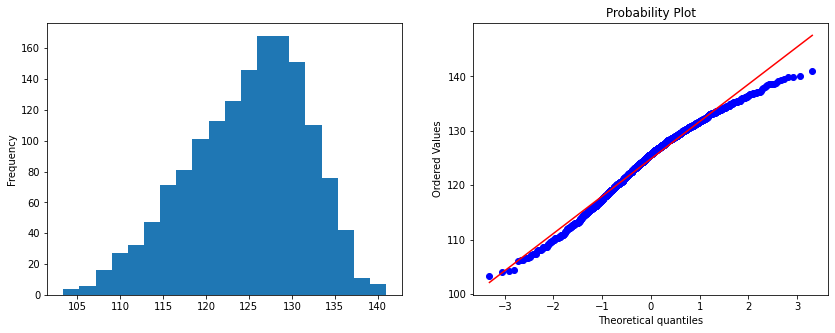

In [9]:
# Checking the distribution of target variables
diagnostic_plot(df, 'sound_level')

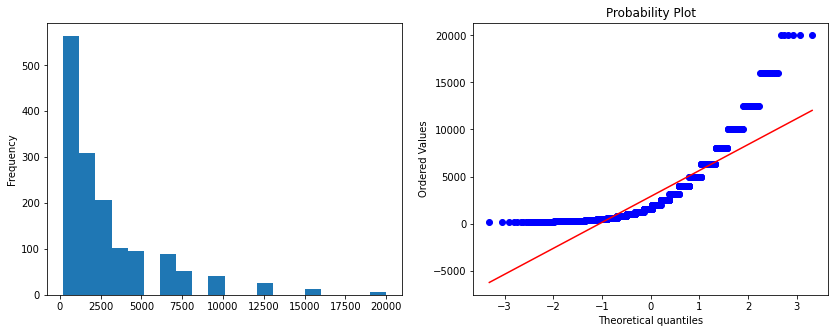

In [10]:
# Checking the distribution of independent variables
diagnostic_plot(df, 'frequency')

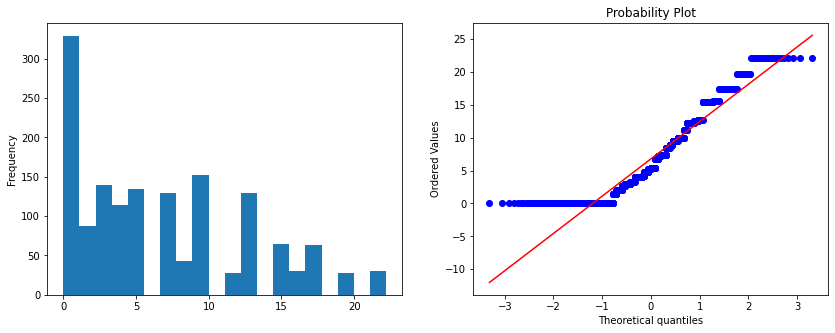

In [11]:
# Checking the distribution of independent variables
diagnostic_plot(df, 'attack_angle')

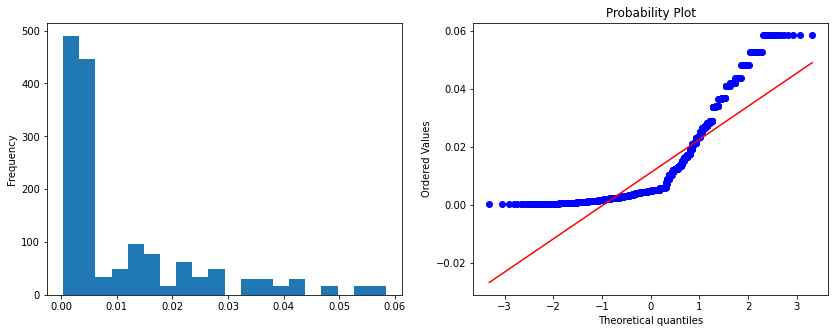

In [12]:
# Checking the distribution of independent variables
diagnostic_plot(df, 'ssd_thickness')

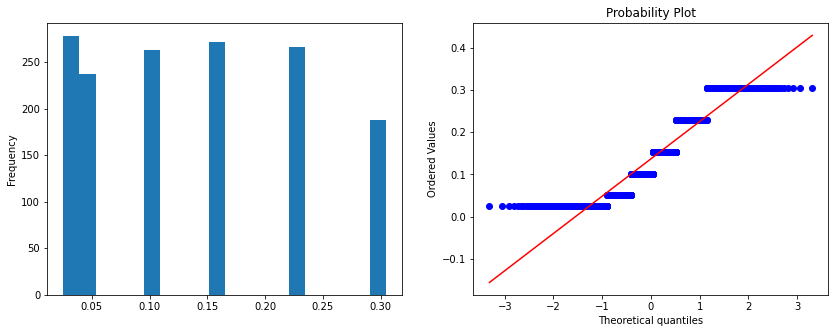

In [13]:
# Checking the distribution of independent variables
diagnostic_plot(df, 'chord_length')

In [14]:
df["chord_length"].unique()

array([0.3048, 0.2286, 0.1524, 0.0508, 0.0254, 0.1016])

In [15]:
df["chord_length"].value_counts()

0.0254    278
0.1524    271
0.2286    266
0.1016    263
0.0508    237
0.3048    188
Name: chord_length, dtype: int64

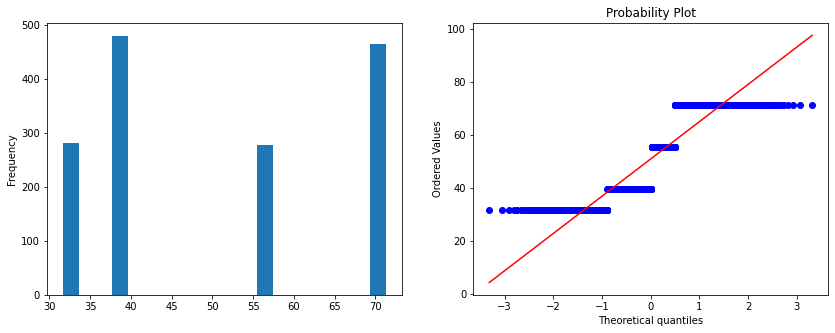

In [16]:
# Checking the distribution of independent variables
diagnostic_plot(df, 'fs_velocity')

In [17]:
df["fs_velocity"].unique()

array([71.3, 55.5, 39.6, 31.7])

In [18]:
df["fs_velocity"].value_counts()

39.6    480
71.3    465
31.7    281
55.5    277
Name: fs_velocity, dtype: int64

### `Observations:`

`
Based on visual analysis performed with the help of histogram and Q-Q plots, it is observed that the target variable is slightly skewed but mostly follow normal distribution which is desired in linear model.`

`But, the independent features are far from following the normal distribution. So, we can try different transformation techniques to convert the distribution to more like Normal Distribution as`**`Linear Models expects data distribution to be normal or near-normal.`**

- `Log Transformation`
- `Reciprocal Transformation`
- `Power Transformation`
- `Box-Cox Transformation`
- `Yeo-Johnson Transformation`


`We tried with below transformations but it didn't help in improving liner regressor model's performance so we decided to not to apply these transformation steps as we don't want to complicate the pre-processing steps unneccesarily.`

```

from feature_engine import variable_transformers as vt

lt = vt.LogTransformer(variables = ['frequency'])
lt.fit(df)
df = lt.transform(df)
diagnostic_plot(df, 'frequency')


lt = vt.YeoJohnsonTransformer(variables = ['attack_angle'])
lt.fit(df)
df = lt.transform(df)
diagnostic_plot(df, 'attack_angle')


lt = vt.LogTransformer(variables = ['ssd_thickness'])
lt.fit(df)
df = lt.transform(df)
diagnostic_plot(df, 'ssd_thickness')

```


`It is also observed that 2 of the independent variables - 'chord_length' and 'fs_velocity' are discrete in nature.`

`We can treat them as categorical features and perform categorical encoding technique on them such as 'ordinal encoding'.`

`But this also didn't seem to imapct the model's performance So, we decided not to perform the below transformation/encoding as well.`

```
from feature_engine import encoding as ce

# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[['chord_length', 'fs_velocity']] = X_train[['chord_length', 'fs_velocity']].astype('O')
X_test[['chord_length', 'fs_velocity']] = X_test[['chord_length', 'fs_velocity']].astype('O')

ordinal_encoder = ce.OrdinalEncoder(encoding_method='ordered', variables=['chord_length', 'fs_velocity'])

# when fitting the transformer, we need to pass the target as well
ordinal_encoder.fit(X_train, y_train)

X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

```

### Perform appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset.

In [19]:
# Checking for missing values in the dataset
df.isnull().sum()

frequency        0
attack_angle     0
chord_length     0
fs_velocity      0
ssd_thickness    0
sound_level      0
dtype: int64

In [20]:
# Checking for missing values in the dataset
df.isna().sum()

frequency        0
attack_angle     0
chord_length     0
fs_velocity      0
ssd_thickness    0
sound_level      0
dtype: int64

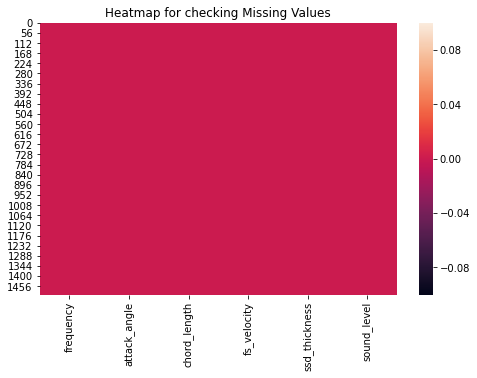

In [21]:
# Visualizing Missing values
plt.figure(figsize=(8,5))
sns.heatmap(df.isna())
plt.title('Heatmap for checking Missing Values')
plt.show()

### `Observations:`
`There are no missing values in any of the variables, so no need to perform missing value imputation steps.`

**Checking for Outliers**
An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

<AxesSubplot:xlabel='frequency'>

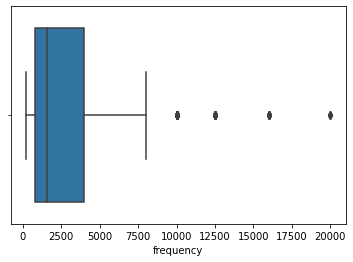

In [22]:
sns.boxplot(df["frequency"])

<AxesSubplot:xlabel='attack_angle'>

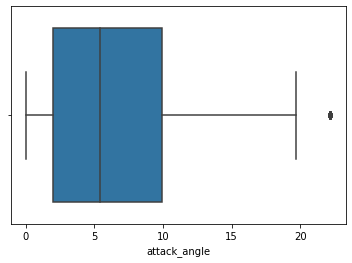

In [23]:
sns.boxplot(df["attack_angle"])

<AxesSubplot:xlabel='ssd_thickness'>

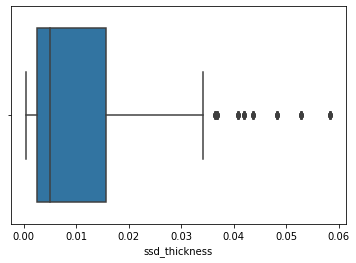

In [24]:
sns.boxplot(df["ssd_thickness"])

### `Observations:`

`Based from the visual analysis using Box-plot it is clear that there are Outliers present among the features - frequency, attack_angle and ssd_thickness.`

`We need to handle these outliers as we know that`**`linear models are sensitive to outliers.`**

**`How can we pre-process outliers?`**
- `Trimming: remove the outliers from our dataset`
- `Treat outliers as missing data, and proceed with any missing data imputation technique`
- `Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution`
- `Censoring: capping the variable distribution at a max and / or minimum value`

In [25]:
def find_outlier_boundaries(data, variable, distance):
    """
    Calculates the boundaries outside which sit the outliers.
    
    distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.
    """
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR * distance)

    return lower_boundary, upper_boundary

In [26]:
# find limits for frequency

freq_lower_limit, freq_upper_limit = find_outlier_boundaries(df, 'frequency', 1.5)
freq_lower_limit, freq_upper_limit

(-4000.0, 8800.0)

In [27]:
# find limits for attack_angle

angle_lower_limit, angle_upper_limit = find_outlier_boundaries(df, 'attack_angle', 1.5)
angle_lower_limit, angle_upper_limit

(-9.850000000000001, 21.75)

In [28]:
# find limits for ssd_thickness

thick_lower_limit, thick_upper_limit = find_outlier_boundaries(df, 'ssd_thickness', 1.5)
thick_lower_limit, thick_upper_limit

(-0.017026075, 0.035137085)

In [29]:
# Now let's replace the outliers by the maximum and minimum limit

df['frequency']= np.where(df['frequency'] > freq_upper_limit, freq_upper_limit,
                       np.where(df['frequency'] < freq_lower_limit, freq_lower_limit, df['frequency']))

In [30]:
# Now let's replace the outliers by the maximum and minimum limit

df['attack_angle']= np.where(df['attack_angle'] > angle_upper_limit, angle_upper_limit,
                       np.where(df['attack_angle'] < angle_lower_limit, angle_lower_limit, df['attack_angle']))

In [31]:
# Now let's replace the outliers by the maximum and minimum limit

df['ssd_thickness']= np.where(df['ssd_thickness'] > thick_upper_limit, thick_upper_limit,
                       np.where(df['ssd_thickness'] < thick_lower_limit, thick_lower_limit, df['ssd_thickness']))

<AxesSubplot:xlabel='frequency'>

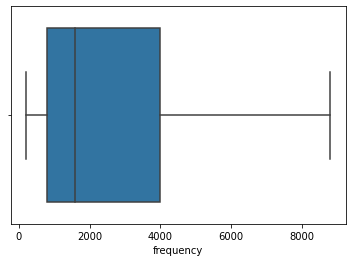

In [32]:
sns.boxplot(df["frequency"])

<AxesSubplot:xlabel='attack_angle'>

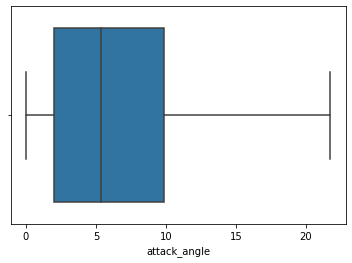

In [33]:
sns.boxplot(df["attack_angle"])

<AxesSubplot:xlabel='ssd_thickness'>

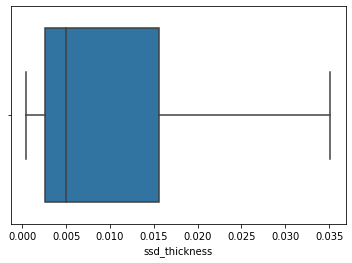

In [34]:
sns.boxplot(df["ssd_thickness"])

### Create a pairplot of all the columns to visualize

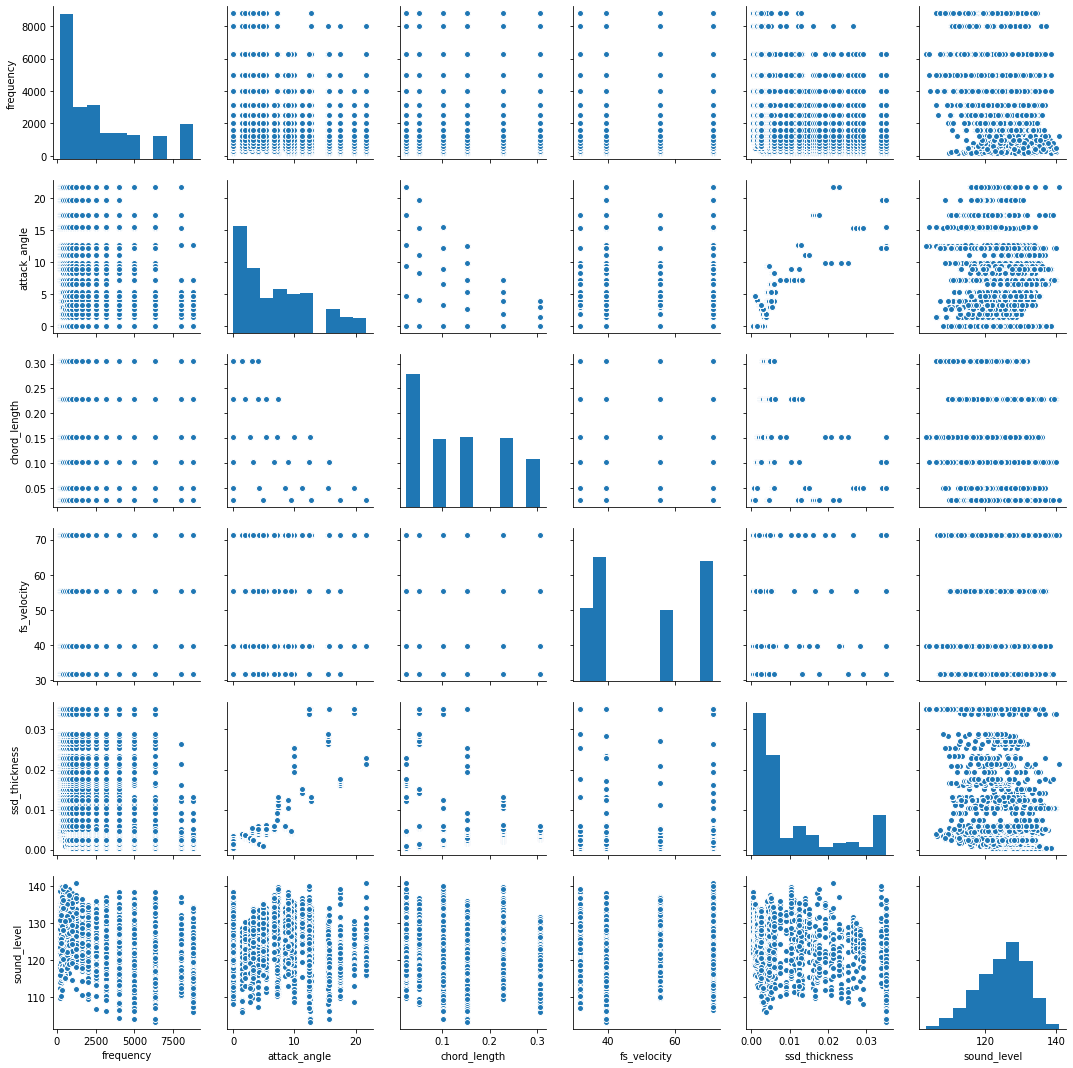

In [35]:
# Create a pairplot of all the columns to visualize
sns.pairplot(df)

### `Observations:`
`Some sort of linear relationship can be seen between "attack_angle" and "ssd_thickness",
apart from that there is almost no linear relationship between any of the other variables.`

### Perform correlational analysis on the dataset. Provide visualization for the same.

In [36]:
# correlational of variables in the dataset
df.corr()

,frequency,attack_angle,chord_length,fs_velocity,ssd_thickness,sound_level
frequency,1.000000,-0.274280,0.003938,0.117396,-0.252480,-0.416397
attack_angle,-0.274280,1.000000,-0.505037,0.058541,0.817985,-0.156645
chord_length,0.003938,-0.505037,1.000000,0.003787,-0.255371,-0.236162
fs_velocity,0.117396,0.058541,0.003787,1.000000,0.010025,0.125103
ssd_thickness,-0.252480,0.817985,-0.255371,0.010025,1.000000,-0.283860
sound_level,-0.416397,-0.156645,-0.236162,0.125103,-0.283860,1.000000


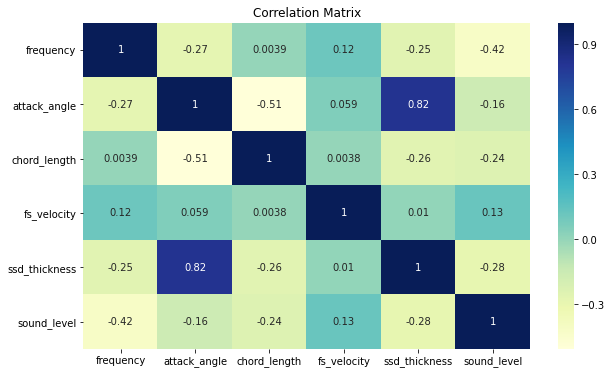

In [37]:
# visualization for Correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

### `Observations:`
`Multicollinearity exists as there is high correlation between two independent variables - "attack_angle" and "ssd_thickness" `

`Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. This means that an independent variable can be predicted from another independent variable in a regression model.`

`This verifies our observation from the pairplot.`

**Handling multi-collinearity among the features**

In [38]:
# We can apply PCA to handle multicollinearity among independent variables.
pca = PCA(n_components=1)
pca.fit(np.array(df[["attack_angle","ssd_thickness"]]))
print("variance explained : ", pca.explained_variance_ratio_)

y = pca.transform(np.array(df[["attack_angle","ssd_thickness"]]))
new_component = pd.DataFrame(y, columns=['new_component'])
df["new_component"] = new_component 
df.drop(columns=["attack_angle","ssd_thickness"], axis=1,inplace=True)

variance explained :  [0.99999885]


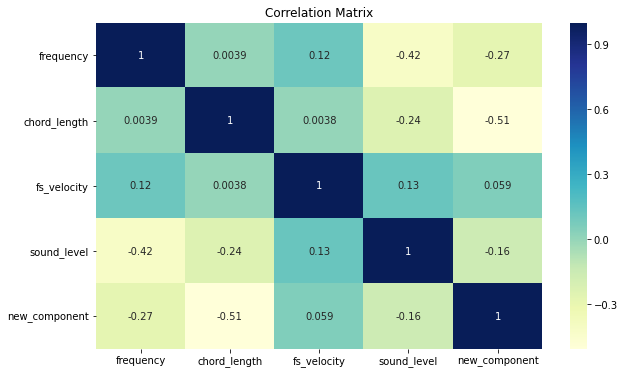

In [39]:
# Checking for Correlation using heatmap after applying PCA
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

### Perform final feature selection and extract them into Column X and the class label [Scaled sound pressure level] into Column Y.


In [40]:
# X: all columns except the target column
# y: only the target column

y = df['sound_level']
X = df.drop('sound_level', axis=1)

### Split the dataset into training and test sets at a ratio of 80:20. Also, try to split the dataset with different ratios of your choice.

In [41]:
# Spliting the dataset into training and test sets at a ratio of 80:20. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [42]:
print("Size of train data : ", X_train.shape)
print("Size of test data : ", X_test.shape)

Size of train data :  (1202, 4)
Size of test data :  (301, 4)


In [43]:
# Standard feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**`We tried Min Max Scaling as well but that's not adding to the model's performance`**
```
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
```

### Create a linear regression model and evaluate the model.

In [44]:
# Creating a linear regression model
lr_model = LinearRegression()

In [45]:
# training the linear regression model on training data set
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
# comparing the model's performance on training and testing set
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.5061482350761628
0.5085535717924776


In [47]:
lr_model.coef_

array([-4.28150482, -3.73192246,  1.60531416, -4.24656095])

In [48]:
lr_model.intercept_

124.70007487520797

### Bring out the predictions for the test set and display results of inference.

In [49]:
# making predictions for the test set
y_pred = lr_model.predict(X_test)

In [50]:
test_table = pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":(y_test-y_pred)})

In [51]:
test_table

,Actual Value,Predicted Value,Difference
1051,132.588,128.995792,3.592208
1286,133.153,130.213709,2.939291
1272,133.261,131.700953,1.560047
778,129.848,133.321278,-3.473278
1236,121.306,117.589176,3.716824
...,...,...,...
495,121.313,121.731564,-0.418564
922,123.695,123.692583,0.002417
26,116.476,114.338224,2.137776
460,129.377,130.300458,-0.923458


In [52]:
test_table.describe()

,Actual Value,Predicted Value,Difference
count,301.000000,301.000000,301.000000
mean,125.378512,124.886088,0.492424
std,6.685136,4.929818,4.660468
min,104.500000,110.537432,-16.810834
25%,120.963000,122.057808,-2.004225
50%,125.630000,124.893601,0.300732
75%,130.588000,128.032989,3.493858
max,140.158000,136.535705,15.023177


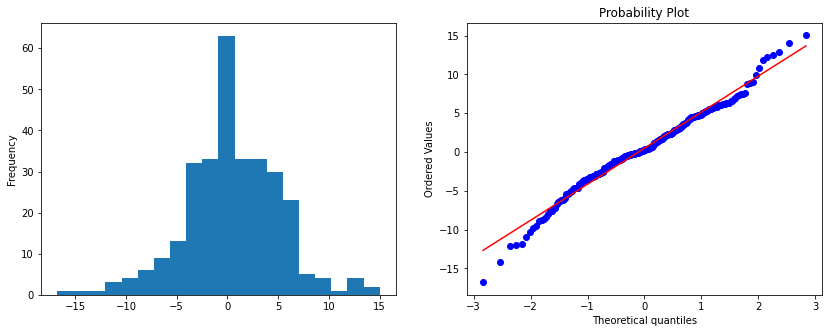

In [53]:
# Error Plot
diagnostic_plot(test_table,'Difference')

### Compare the various regression evaluation metrics - R squared value, MAE, MSE, RMSE

In [54]:
def evaluate_model_performance(actual_value, predicted_value):
    
    sns.regplot(actual_value, predicted_value, line_kws={'color':'red'})
    plt.show()
    
    # Calculating various regression evaluation metrics - R squared value, MAE, MSE, RMSE
    print(f'The R2 Score is : ', r2_score(actual_value, predicted_value))
    print(f'The Mean Absolute Error is : ', mean_absolute_error(actual_value, predicted_value))
    print(f'The Mean Squared Error is : ', mean_squared_error(actual_value, predicted_value))
    print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(actual_value, predicted_value)))
    

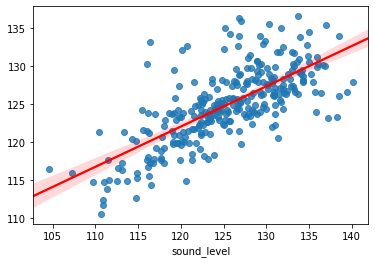

The R2 Score is :  0.5085535717924776
The Mean Absolute Error is :  3.5025629302220995
The Mean Squared Error is :  21.89028627530761
The Root Mean Squared Error is :  4.678705619646059


In [55]:
evaluate_model_performance(y_test, y_pred)

# `Additional`

### `Ridge Regression`

Training Score:  0.5061464973310009
Testing Score:  0.5086027509784148


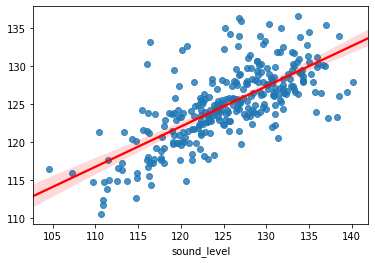

The R2 Score is :  0.5086027509784148
The Mean Absolute Error is :  3.5032765829855017
The Mean Squared Error is :  21.888095708040936
The Root Mean Squared Error is :  4.678471514078176


In [56]:
from sklearn.linear_model import Ridge

rlr_model = Ridge()
rlr_model.fit(X_train, y_train)

# comparing the model's performance on training and testing set
print('Training Score: ', rlr_model.score(X_train, y_train))
print('Testing Score: ', rlr_model.score(X_test, y_test))

# Evaluating the model's performance on testing set
evaluate_model_performance(y_test, rlr_model.predict(X_test))

### `Lasso Regression`

Training Score:  0.3271501036345006
Testing Score:  0.3246037933640862


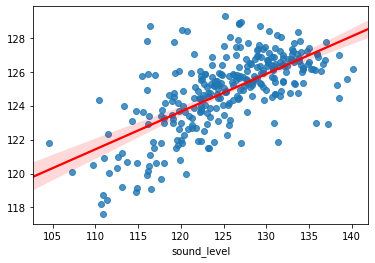

The R2 Score is :  0.3246037933640862
The Mean Absolute Error is :  4.373648295270381
The Mean Squared Error is :  30.083881912503973
The Root Mean Squared Error is :  5.484877565862703


In [57]:
from sklearn.linear_model import Lasso

llr_model = Lasso()
llr_model.fit(X_train, y_train)

# comparing the model's performance on training and testing set
print('Training Score: ', llr_model.score(X_train, y_train))
print('Testing Score: ', llr_model.score(X_test, y_test))

# Evaluating the model's performance on testing set
evaluate_model_performance(y_test, llr_model.predict(X_test))

### `Decision Tree Regressor `

Training Score:  0.9920997622045916
Testing Score:  0.8273056279227234


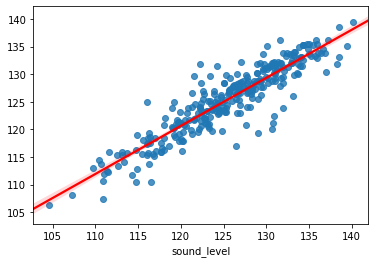

The R2 Score is :  0.8273056279227234
The Mean Absolute Error is :  2.006946843853821
The Mean Squared Error is :  7.692250926910304
The Root Mean Squared Error is :  2.773490747579718


In [58]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

# comparing the model's performance on training and testing set
print('Training Score: ', dtr_model.score(X_train, y_train))
print('Testing Score: ', dtr_model.score(X_test, y_test))

# Evaluating the model's performance on testing set
evaluate_model_performance(y_test, dtr_model.predict(X_test))

### `Random Forest Regressor `

Training Score:  0.9824069072700297
Testing Score:  0.912156234417151


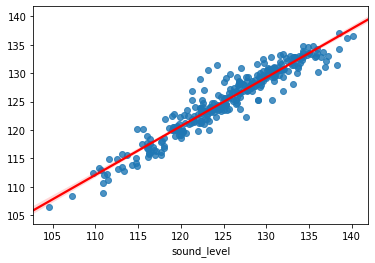

The R2 Score is :  0.912156234417151
The Mean Absolute Error is :  1.4169075225439014
The Mean Squared Error is :  3.9127869605709837
The Root Mean Squared Error is :  1.9780765810683325


In [59]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(X_train, y_train)

# comparing the model's performance on training and testing set
print('Training Score: ', rf_model.score(X_train, y_train))
print('Testing Score: ', rf_model.score(X_test, y_test))

# Evaluating the model's performance on testing set
evaluate_model_performance(y_test, rf_model.predict(X_test))